## Global Approximation with Interpolation 

Interpolation: Approximate $e^{x+1}$ on $[−1, 1]$ using 5th order polynomials. \
First use uniform nodes, and then use Chebyshev nodes. Compare the
results.

In [1]:
import numpy as np

def f(x):
    return np.exp(x + 1)

### Uniform nodes

In [2]:
nrows = 5
X = np.zeros((nrows, 5))
X[:,0] = 1
X[:,1] = np.linspace(-1, 1, nrows)
for j in range(1, np.shape(X)[1]):
    X[:, j] = X[:, 1]**j

f_X = np.array([f(x) for x in X[:, 1]])

A_uni = np.linalg.inv(X) @ f_X
A_uni

array([2.71828183, 2.71244772, 1.35817575, 0.48208033, 0.11807047])

### Chebyshev nodes

In [3]:
nrows = 5
X = np.zeros((nrows, 5))
X[:,0] = 1
X[:,1] = np.array([np.cos((2*k - 1)/(2*nrows)*np.pi) for k in range(1, nrows + 1)])
for j in range(1, np.shape(X)[1]):
    X[:, j] = X[:, 1]**j

f_X = np.array([f(x) for x in X[:, 1]])

A_cheb = np.linalg.inv(X) @ f_X
A_cheb

array([2.71828183, 2.71098934, 1.35793447, 0.48204544, 0.11806614])

### Comparison

In [4]:
nrows = 50
X = np.zeros((nrows, 5))
X[:,0] = 1
X[:,1] = np.linspace(-1, 1, nrows)
for j in range(1, np.shape(X)[1]):
    X[:, j] = X[:, 1]**j

f_X = np.array([f(x) for x in X[:, 1]])

f_X_uni = X @ A_uni
f_X_cheb = X @ A_cheb


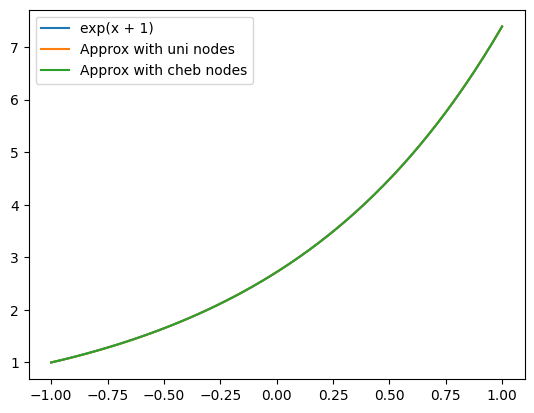

In [6]:
import matplotlib.pyplot as plt

plt.plot(X[:,1], f_X, label = "exp(x + 1)")
plt.plot(X[:,1], f_X_uni, label = "Approx with uni nodes")
plt.plot(X[:,1], f_X_cheb, label = "Approx with cheb nodes")

plt.legend()
plt.show()

In [65]:
diff_uni = sum((f_X - f_X_uni)**2)
diff_cheb = sum((f_X - f_X_cheb)**2)

print(f"Diff. with uni nodes: {diff_uni}")
print(f"Diff. with cheb nodes: {diff_cheb}")
print(f"diff_uni / diff_cheb: {diff_uni/diff_cheb}")

Diff. with uni nodes: 0.00010036508583761389
Diff. with cheb nodes: 5.592027070536347e-05
diff_uni / diff_cheb: 1.7947889838807163


## Integration with Gauss-Hermite quadrature

Integration: Compute $E[X^2]$, where $log X ∈ N(0, 1)$, by Gauss-Hermite
quadrature.


In [6]:
import numpy as np

X = np.polynomial.hermite.hermgauss(10)[0]
W = np.polynomial.hermite.hermgauss(10)[1]

E_X2 = 1/np.sqrt(np.pi)*sum([W[i]*np.exp(2*np.sqrt(2)*X[i]) for i in range(len(W))])
E_X2

7.3890520070865335